# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju


- Nama: Agung Firmansyah
- Email: agungfir98@gmail.com
- Id Dicoding: agung_firmansyah98


## Persiapan


### Menyiapkan library yang dibutuhkan


In [338]:
# system dependencies
import os
from dotenv import load_dotenv

# data dependencies
import pandas as pd
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

import joblib

### Menyiapkan data yang akan diguankan


## Data Understanding


### Employee Data

The data contains demographic details, work-related metrics and attrition flag.

- **EmployeeId** - Employee Identifier
- **Attrition** - Did the employee attrition? (0=no, 1=yes)
- **Age** - Age of the employee
- **BusinessTravel** - Travel commitments for the job
- **DailyRate** - Daily salary
- **Department** - Employee Department
- **DistanceFromHome** - Distance from work to home (in km)
- **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
- **EducationField** - Field of Education
- **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
- **Gender** - Employee's gender
- **HourlyRate** - Hourly salary
- **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
- **JobLevel** - Level of job (1 to 5)
- **JobRole** - Job Roles
- **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
- **MaritalStatus** - Marital Status
- **MonthlyIncome** - Monthly salary
- **MonthlyRate** - Mounthly rate
- **NumCompaniesWorked** - Number of companies worked at
- **Over18** - Over 18 years of age?
- **OverTime** - Overtime?
- **PercentSalaryHike** - The percentage increase in salary last year
- **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
- **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
- **StandardHours** - Standard Hours
- **StockOptionLevel** - Stock Option Level
- **TotalWorkingYears** - Total years worked
- **TrainingTimesLastYear** - Number of training attended last year
- **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
- **YearsAtCompany** - Years at Company
- **YearsInCurrentRole** - Years in the current role
- **YearsSinceLastPromotion** - Years since the last promotion
- **YearsWithCurrManager** - Years with the current manager


In [339]:
df = pd.read_csv("employee-data.csv")
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [340]:
df.dropna(inplace=True)

In [341]:
df['Attrition'] = df['Attrition'].astype(int)

In [342]:
columns_to_drop = ["EmployeeId", "EmployeeCount", "StandardHours", "Over18"]
df.drop(columns=columns_to_drop, inplace=True)
clean_df = df.copy()

In [343]:
clean_df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058,1058.000000,1058,1058.000000,1058.000000,1058,1058.000000,1058,...,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
unique,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,746,NaN,701,NaN,NaN,436,NaN,620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,37.055766,0.169187,NaN,809.542533,NaN,8.978261,2.879017,NaN,2.712665,NaN,...,3.150284,2.726843,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,9.410421,0.375094,NaN,408.478049,NaN,8.040608,1.031442,NaN,1.092959,NaN,...,0.357518,1.090970,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,0.000000,NaN,465.250000,NaN,2.000000,2.000000,NaN,2.000000,NaN,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,0.000000,NaN,817.500000,NaN,7.000000,3.000000,NaN,3.000000,NaN,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,0.000000,NaN,1168.500000,NaN,13.000000,4.000000,NaN,4.000000,NaN,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000


### mengekspor data ke postgresql untuk keperluan dashboard


In [344]:
load_dotenv(".env")

DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_URL = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

engine = create_engine(DB_URL)

clean_df = df.copy()
clean_df.to_sql("employees", con=engine.connect(), if_exists="replace")

58

#


In [364]:
clean_df.to_csv("clean-employee-data.csv", index=False)

Attrition
0    0.830813
1    0.169187
Name: proportion, dtype: float64


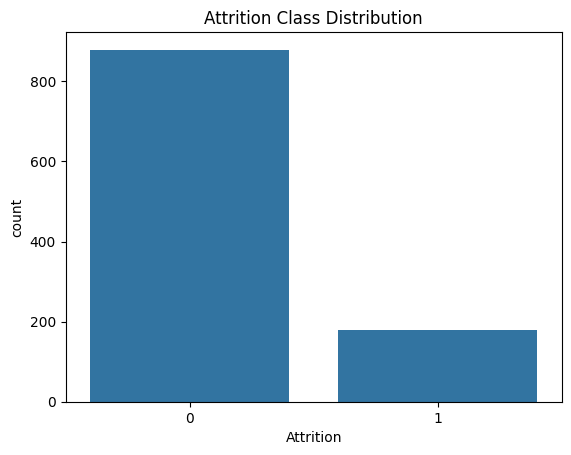

In [345]:
print(clean_df['Attrition'].value_counts(normalize=True))

sns.countplot(data=clean_df, x='Attrition')
plt.title("Attrition Class Distribution")
plt.show()

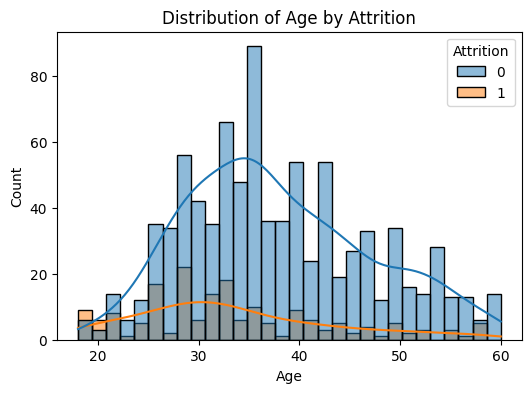

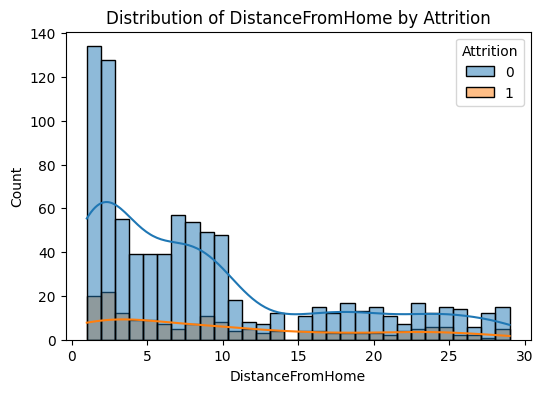

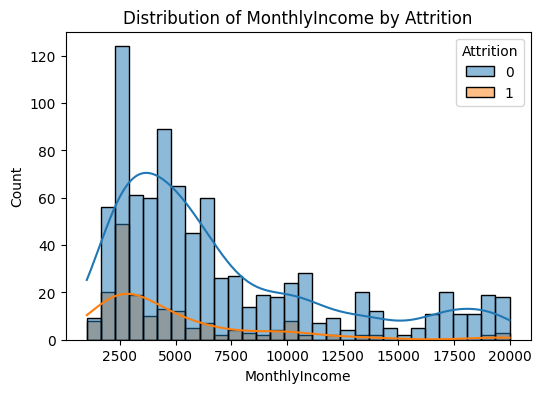

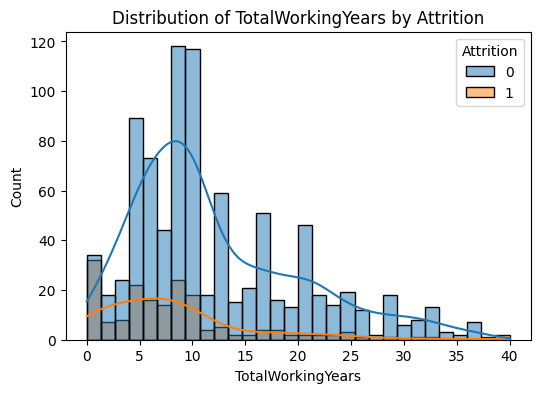

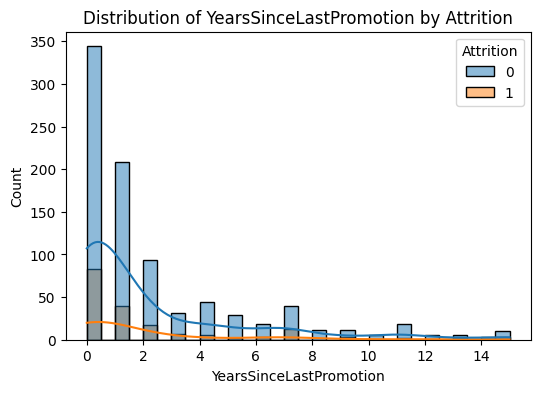

In [346]:
num_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome',
            'TotalWorkingYears', 'YearsSinceLastPromotion']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=clean_df, x=col, hue='Attrition', kde=True, bins=30)
    plt.title(f'Distribution of {col} by Attrition')
    plt.show()

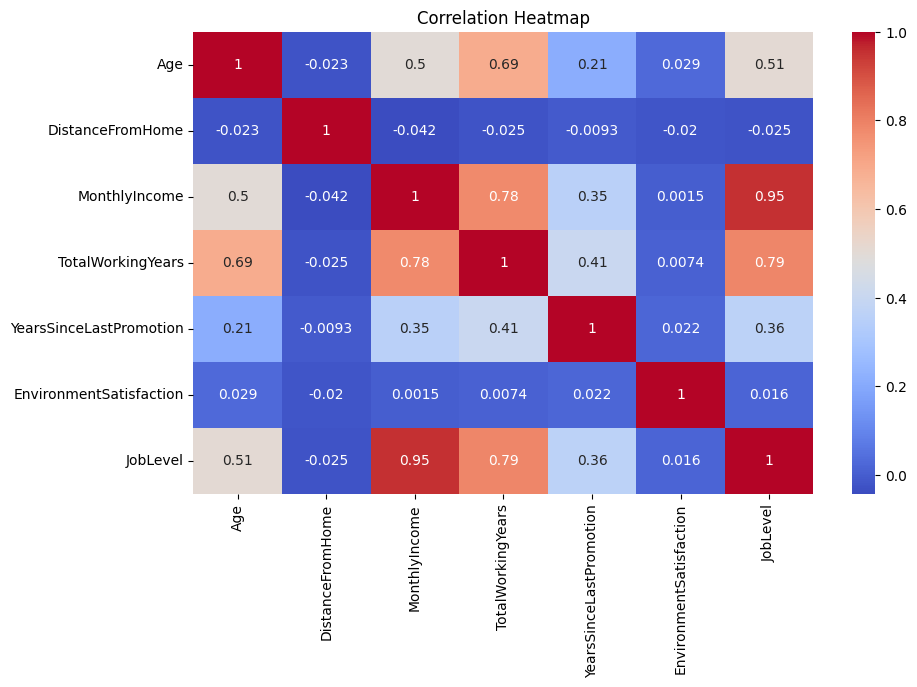

In [347]:
plt.figure(figsize=(10, 6))
sns.heatmap(clean_df[num_cols + ['EnvironmentSatisfaction',
            'JobLevel']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Data Preparation / Preprocessing


In [348]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EnvironmentSatisfaction   1058 non-null   int64 
 9   Gender                    1058 non-null   object
 10  HourlyRate                1058 non-null   int64 
 11  JobInvolvement            1058 non-null   int64 
 12  JobLevel                  1058 non-null   int64 
 13  JobRole                   1058 non-null   object
 14  JobSatisfaction           105

In [349]:
selected_columns = [
    "Attrition", "Age", "BusinessTravel", "DistanceFromHome", "EnvironmentSatisfaction",
    "JobInvolvement", "JobSatisfaction", "MonthlyIncome", "OverTime", "RelationshipSatisfaction", "WorkLifeBalance",
    "PerformanceRating", "EducationField", "NumCompaniesWorked", "JobRole", "TotalWorkingYears", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"
]
selected_df = clean_df[selected_columns].copy()

target = "Attrition"

nominal_feature = ["BusinessTravel", "OverTime", "EducationField", "JobRole"]

numerical_feature = selected_df.select_dtypes(
    include=['int64']).columns.drop(target)

In [350]:
selected_df = pd.get_dummies(
    selected_df, columns=nominal_feature, drop_first=True)

In [351]:
scaler = StandardScaler()
selected_df[numerical_feature] = scaler.fit_transform(
    selected_df[numerical_feature])

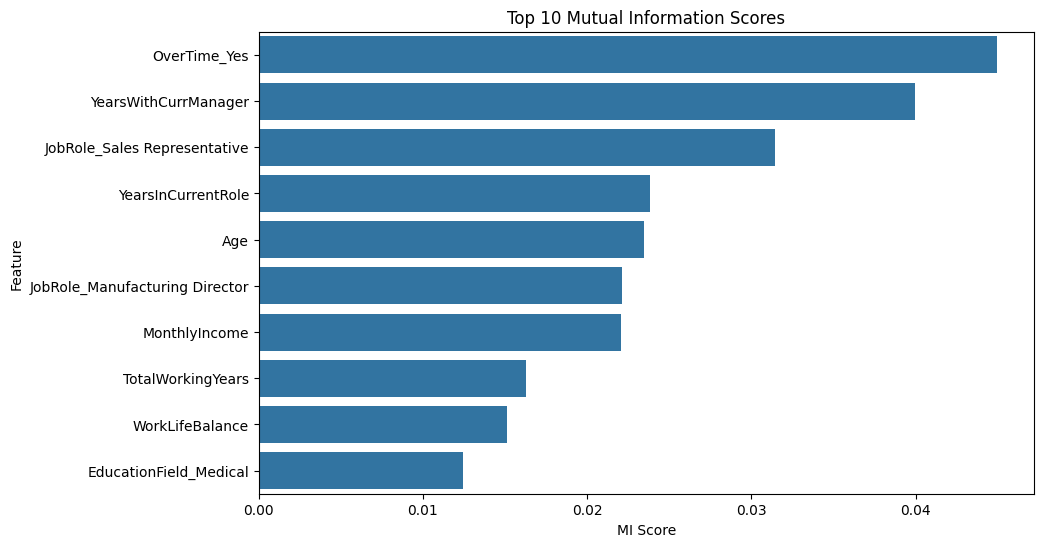

In [352]:
X = selected_df.drop(columns=target)
Y = selected_df[target]

X_encoded = pd.get_dummies(X, drop_first=True)

mi = mutual_info_classif(X_encoded, Y, discrete_features='auto')

mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'MI Score': mi})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=mi_df.head(10), x='MI Score', y='Feature')
plt.title('Top 10 Mutual Information Scores')
plt.show()

In [353]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1)

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

## Modeling


#### Random Forest


In [354]:
RF_model = RandomForestClassifier()
RF_model.fit(x_train_resampled, y_train_resampled)

RF_y_train_pred = RF_model.predict(x_train)
RF_y_test_pred = RF_model.predict(x_test)

accuracy_train_rf = accuracy_score(RF_y_train_pred, y_train)
accuracy_test_rf = accuracy_score(RF_y_test_pred, y_test)

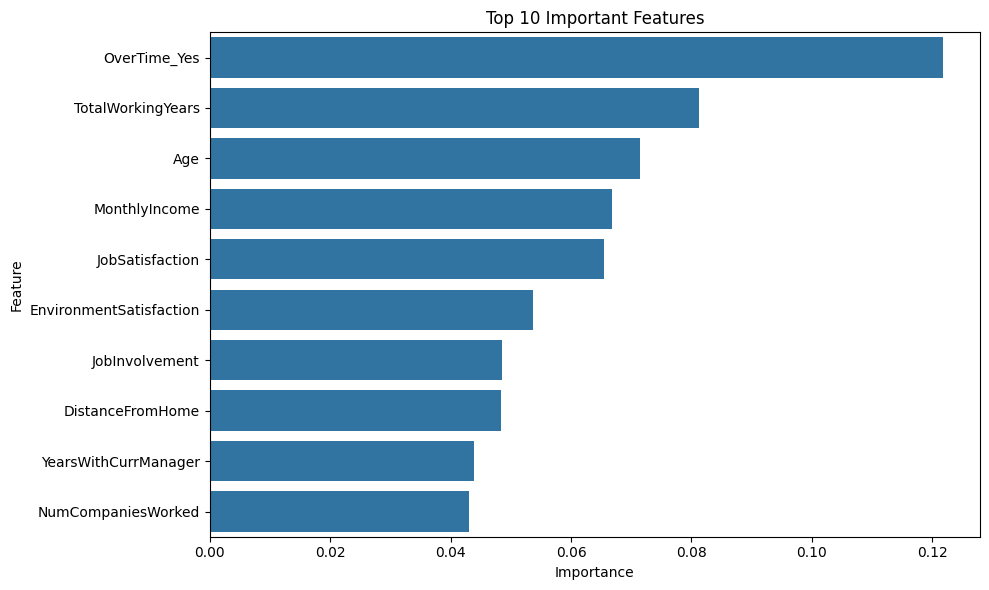

In [355]:
importances = RF_model.feature_importances_
feat_names = x_train.columns
feat_importance_df = pd.DataFrame(
    {'Feature': feat_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(
    by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()

#### Logististic Regression


In [356]:
LR_model = LogisticRegression(max_iter=1000)
LR_model.fit(x_train_resampled, y_train_resampled)

LR_y_train_pred = LR_model.predict(x_train)
LR_y_test_pred = LR_model.predict(x_test)

accuracy_train_lr = accuracy_score(LR_y_train_pred, y_train)
accuracy_test_lr = accuracy_score(LR_y_test_pred, y_test)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}
grid = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=5)
grid.fit(x_train_resampled, y_train_resampled)

print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.8707301683450694


#### Decission Tree


In [357]:
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train_resampled, y_train_resampled)

DT_y_train_pred = DT_model.predict(x_train)
DT_y_test_pred = DT_model.predict(x_test)

accuracy_train_dt = accuracy_score(DT_y_train_pred, y_train)
accuracy_test_dt = accuracy_score(DT_y_test_pred, y_test)

## Evaluation


#### Random Forest


In [358]:
print("Training Set Classification Report:")
print(classification_report(y_train, RF_y_train_pred))
print('-' * 50)
print("Test Set Classification Report:")
print(classification_report(y_test, RF_y_test_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       703
           1       1.00      1.00      1.00       143

    accuracy                           1.00       846
   macro avg       1.00      1.00      1.00       846
weighted avg       1.00      1.00      1.00       846

--------------------------------------------------
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       176
           1       0.33      0.11      0.17        36

    accuracy                           0.81       212
   macro avg       0.59      0.53      0.53       212
weighted avg       0.75      0.81      0.77       212



#### Logistic Regression


In [359]:
print("Training Set Classification Report:")
print(classification_report(y_train, LR_y_train_pred))
print('-' * 50)
print("Test Set Classification Report:")
print(classification_report(y_test, LR_y_test_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       703
           1       0.57      0.54      0.55       143

    accuracy                           0.85       846
   macro avg       0.74      0.73      0.73       846
weighted avg       0.85      0.85      0.85       846

--------------------------------------------------
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       176
           1       0.52      0.39      0.44        36

    accuracy                           0.83       212
   macro avg       0.70      0.66      0.67       212
weighted avg       0.82      0.83      0.83       212



#### Decission Tree


In [360]:
print("Training Set Classification Report:")
print(classification_report(y_train, DT_y_train_pred))
print('-' * 50)
print("Test Set Classification Report:")
print(classification_report(y_test, DT_y_test_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       703
           1       1.00      1.00      1.00       143

    accuracy                           1.00       846
   macro avg       1.00      1.00      1.00       846
weighted avg       1.00      1.00      1.00       846

--------------------------------------------------
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       176
           1       0.31      0.31      0.31        36

    accuracy                           0.77       212
   macro avg       0.59      0.58      0.59       212
weighted avg       0.77      0.77      0.77       212



### saving model

In [361]:
joblib.dump(grid, "./model/logistic_mode_gridsearch.pkl")
joblib.dump(scaler, "./model/scaler.pkl")

['./model/scaler.pkl']